In [5]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('ltccovidsummarydata.csv')
df
#102 entries with 7 columns.
#columns in the dataframe are the following: Report_Data_Extracted (date of reporting new statistics).
#LTC_Homes_with_Active_Outbreak is how many ltc homes report a covid-19 case on the report date.
#LTC_Homes_with_Resolved_Outbreak how many ltc homes have been resolved from any covid-19 cases.
#Confirmed_Active_LTC_Resident_Cases is confirmed number of residents in home with covid-19 at date.
#Confirmed_Active_LTC_HCW_Cases is confirmed number of staffs in home with covid-19 at date.
#Total_LTC_Resident_Deaths is number of total deaths occuring from covid-19 in care homes measured on report date
#Total_LTC_HCW_Deaths is the cumulative COVID-19 related deaths of Long- Term Care home health care workers (HCW) as measured on "Report_Data_Extracted" date.

,Report_Data_Extracted,LTC_Homes_with_Active_Outbreak,LTC_Homes_with_Resolved_Outbreak,Confirmed_Active_LTC_Resident_Cases,Confirmed_Active_LTC_HCW_Cases,Total_LTC_Resident_Deaths,Total_LTC_HCW_Deaths
0,2020-04-24,145,31,2455,1120,625,<5
1,2020-04-25,147,31,2520,1161,654,<5
2,2020-04-26,150,32,2523,1187,671,<5
3,2020-04-27,154,34,2491,1205,705,<5
4,2020-04-28,159,34,2632,1361,775,<5
...,...,...,...,...,...,...,...
97,2020-07-30,17,310,9,37,1845,8
98,2020-07-31,19,309,10,37,1845,8
99,2020-08-01,20,309,10,37,1845,8
100,2020-08-02,23,308,11,40,1845,8


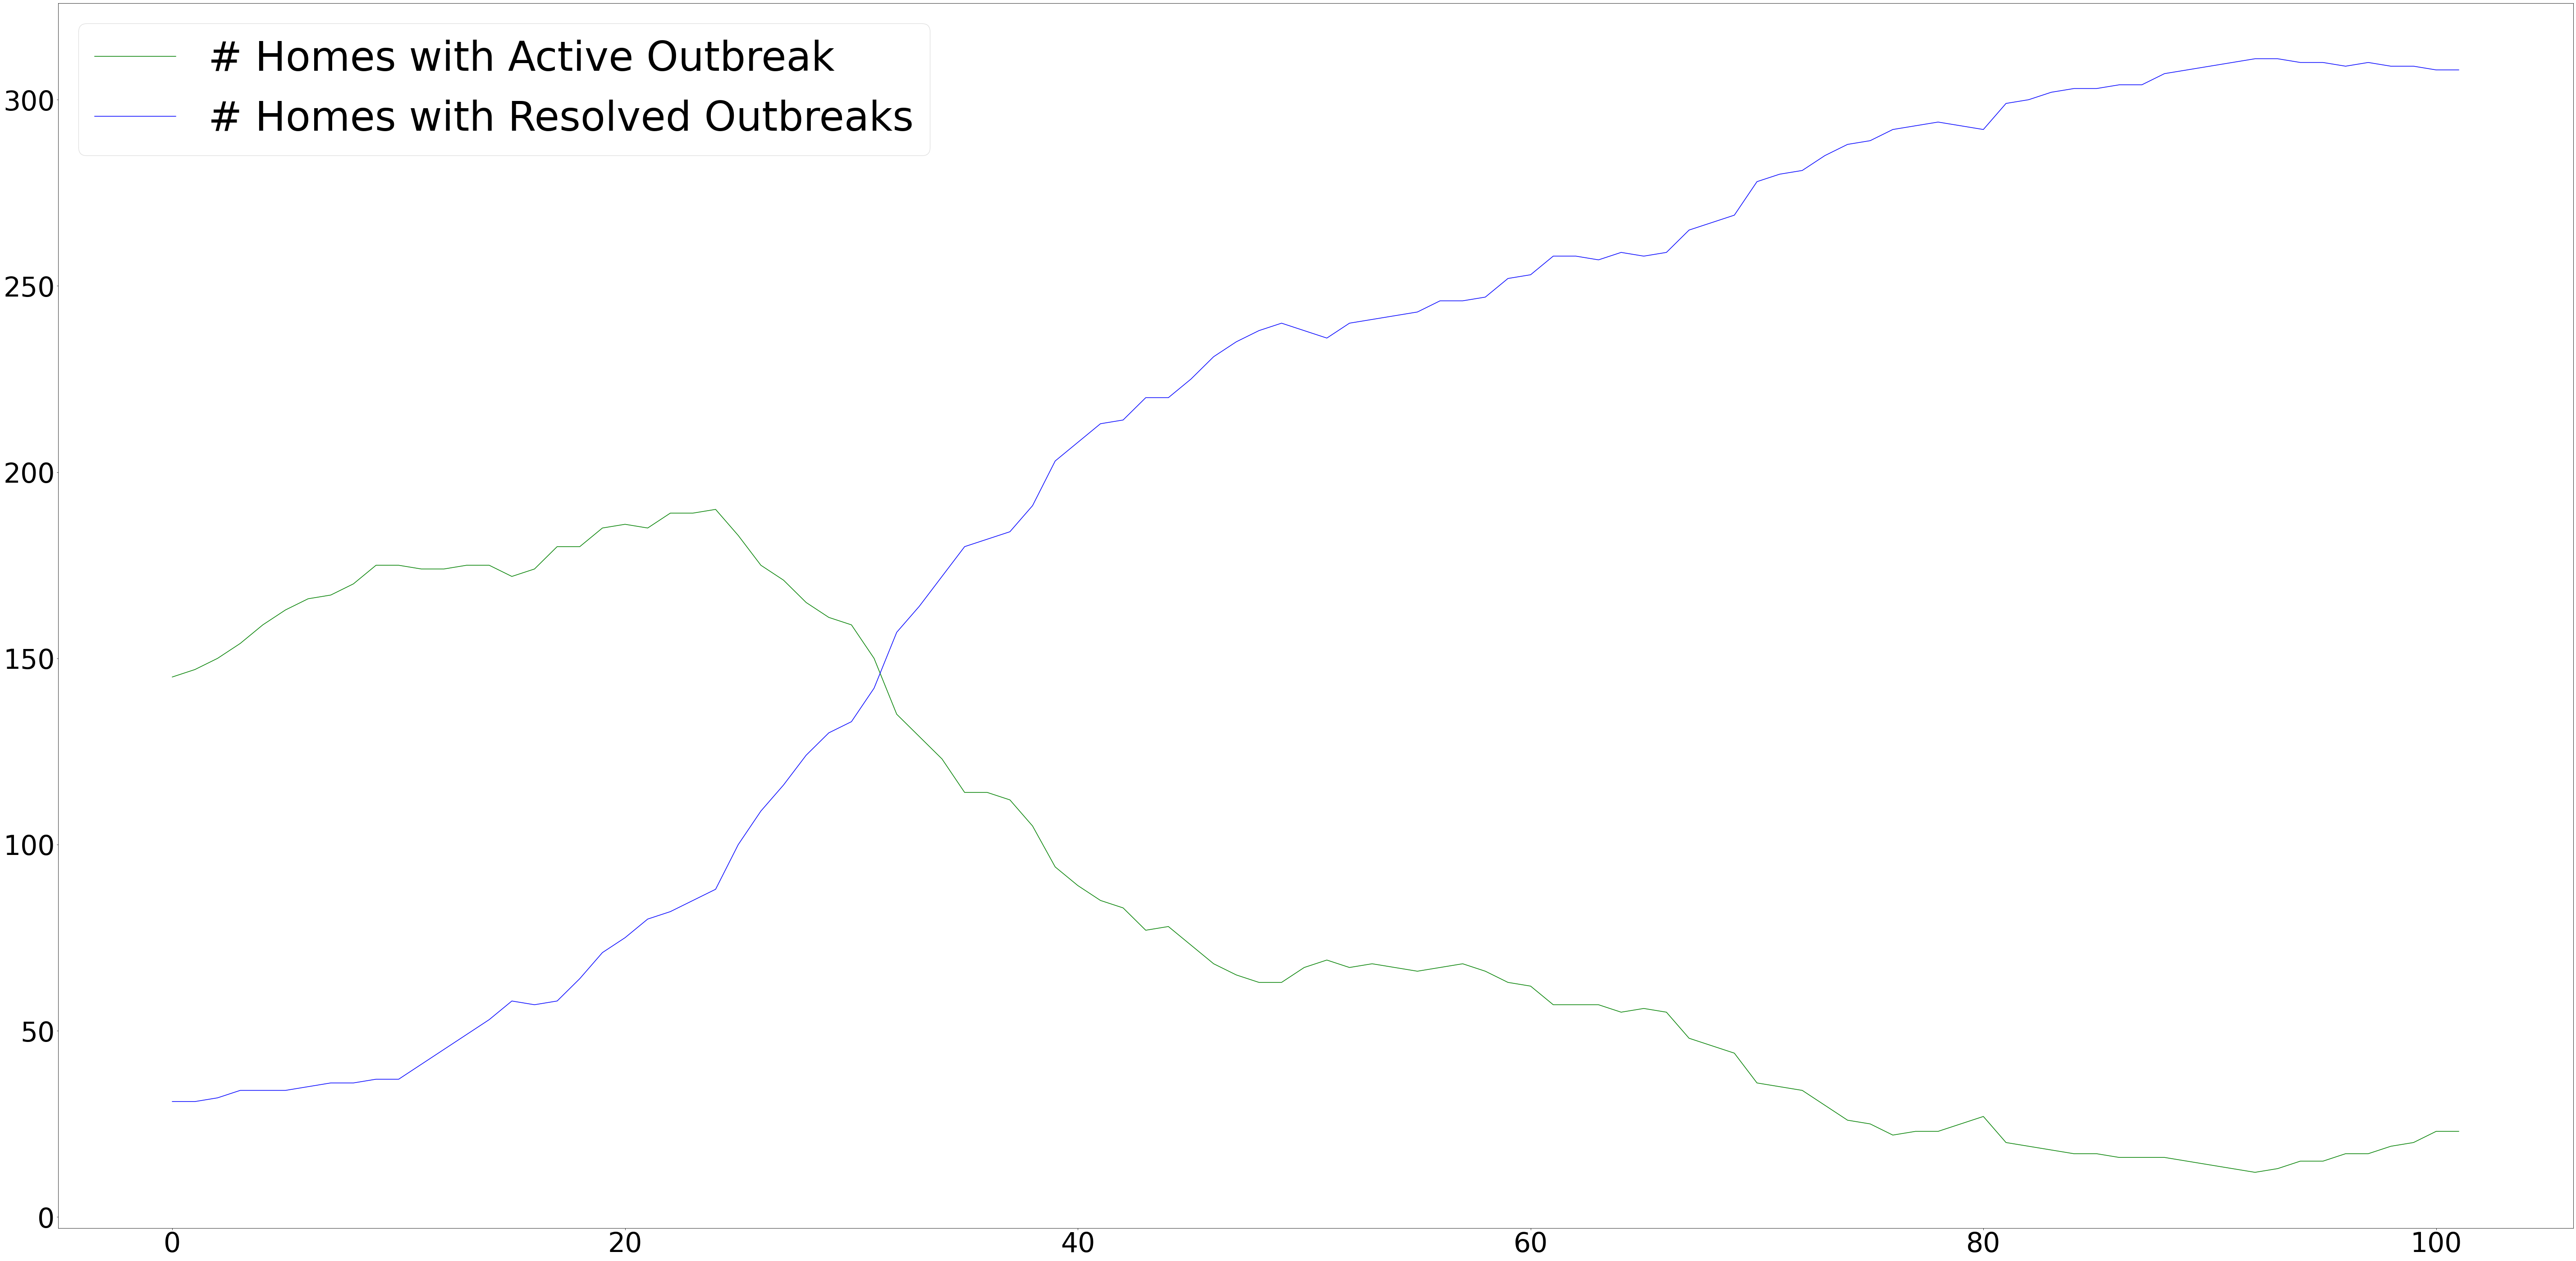

In [34]:
#oldest report date extracted is 2020-04-24 and latest report date is 2020-08-03.
#observing trend of number of homes with active outbreak from start to end of dataset:
df_active_outbreak = df.groupby('Report_Data_Extracted').LTC_Homes_with_Active_Outbreak.sum().reset_index()
df_active_outbreak.rename(columns={'LTC_Homes_with_Active_Outbreak': '# Homes with Active Outbreak'}, inplace=True)
ax = df_active_outbreak.plot(color='green', figsize=(100,50))
plt.tick_params(axis='x', labelsize=60)
plt.tick_params(axis='y', labelsize=60)
#Largest number of cases was reported on day 24, with a consistent trend downward in cases until day 50 with a small increase on day 50 to 60, then resumed downward trend until day 101.
#Graph looks as expected.
df_resolved_outbreak = df.groupby('Report_Data_Extracted').LTC_Homes_with_Resolved_Outbreak.sum().reset_index()
df_resolved_outbreak.rename(columns={'LTC_Homes_with_Resolved_Outbreak': '# Homes with Resolved Outbreaks'}, inplace=True)
df_resolved_outbreak.plot(color='blue', ax=ax)
plt.legend(prop={'size': 90})
plt.savefig('Active_outbreak_vs_resolved_outbreak.png')
#As expected, as number of care homes with active outbreaks decreases, the number of care homes with resolved outbreaks increases, showing no irregularity with the data.
#Changing x-ticks to better measure days in which spikes of outbreaks occured.

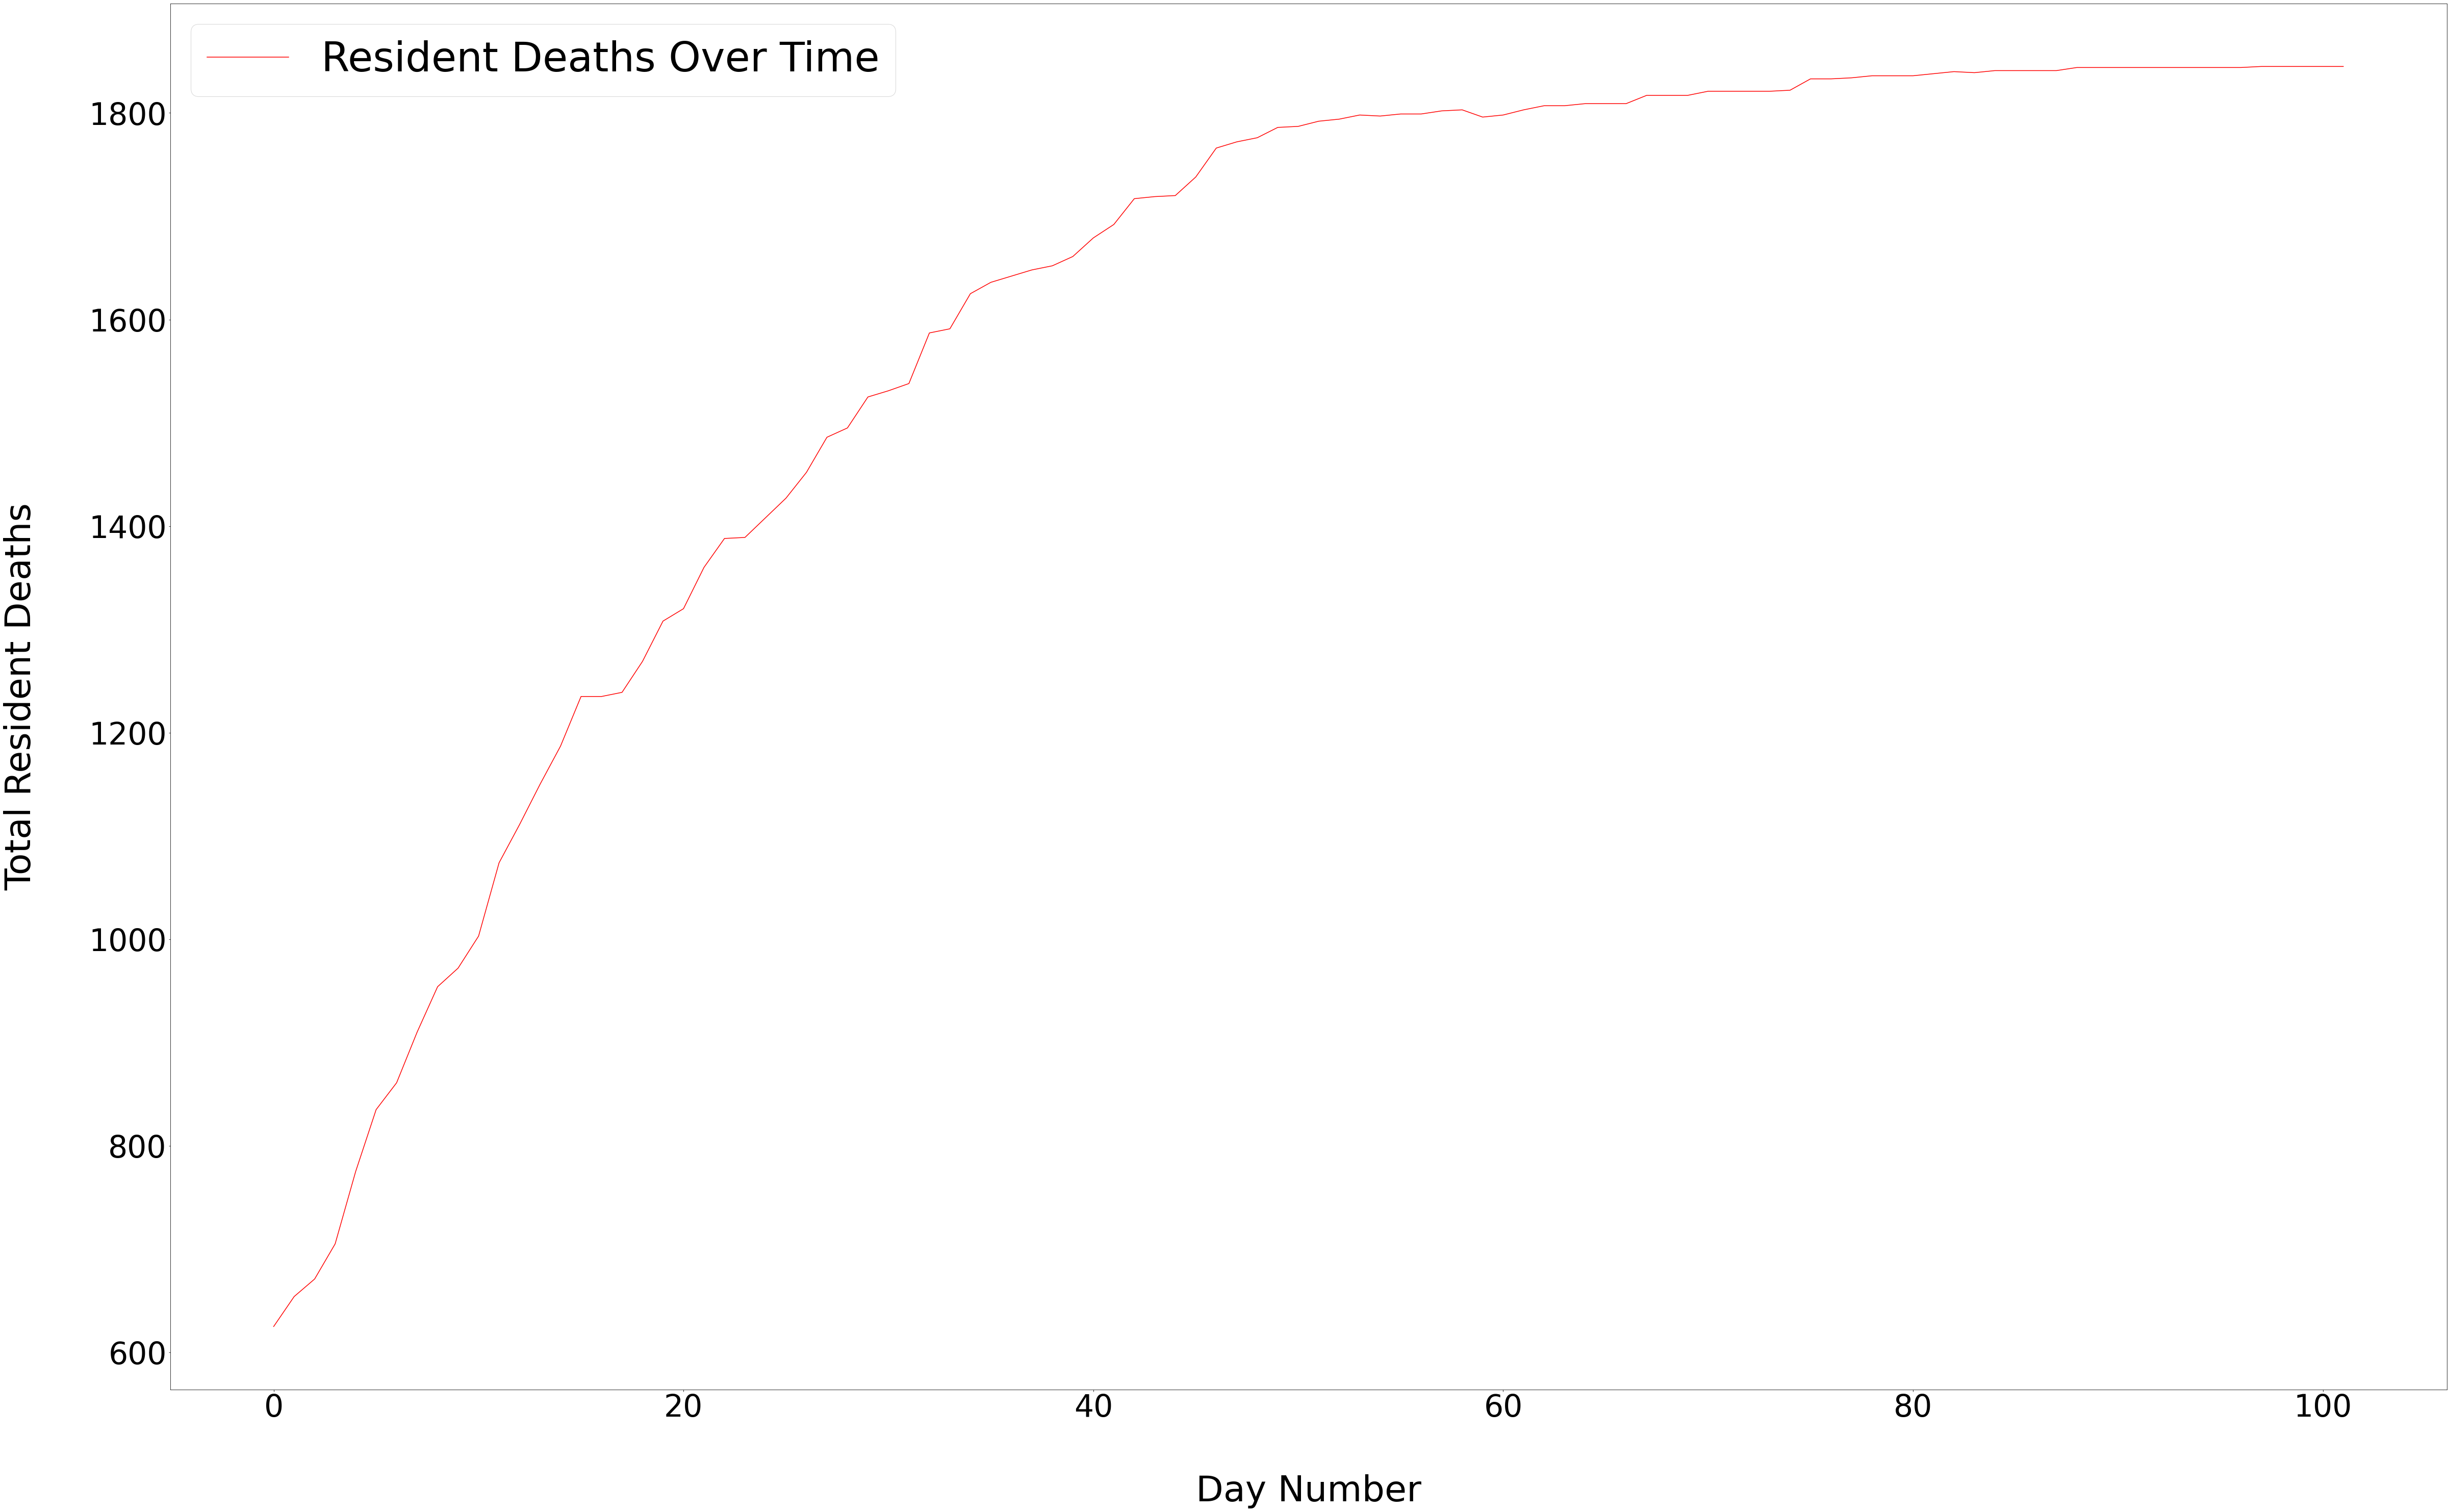

In [8]:
#Examining trend of Total_LTC_Resident_Deaths
df_resident_deaths = df.groupby('Report_Data_Extracted').Total_LTC_Resident_Deaths.sum().reset_index()
df_resident_deaths.rename(columns={'Total_LTC_Resident_Deaths': 'Resident Deaths Over Time'}, inplace=True)
ax2 = df_resident_deaths.plot(color='red', figsize=(80,50))
plt.tick_params(axis='x', labelsize=60)
plt.tick_params(axis='y', labelsize=60)
plt.ylabel('Total Resident Deaths', fontsize=70, labelpad=100)
plt.xlabel('Day Number', fontsize=70, labelpad=100)
plt.legend(prop={'size':80})
plt.savefig('Resident_deaths_vs_time.png')
#Steady increase of deaths through the first approx. 50 recorded days.
#On day approx. 75 the graph begins to plateau and towards day 100 the death count begins to flatten out.
#Data correlates with increase in caretaking homes that have resolved outbreaks.